# Python Exercise : Decision Tree Clasiifier

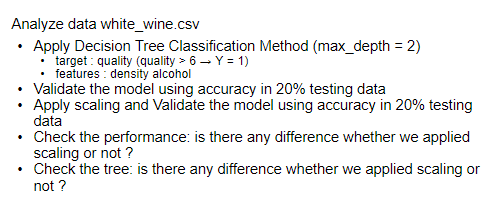

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [3]:
wine = pd.read_csv('../../data/white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [4]:
wine['label'] = np.where(wine['quality']>6,1,0)

In [5]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)

> ## W/o Scaling

In [9]:
X = wine[['alcohol', 'density']]
y = wine['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020, stratify=y)

In [10]:
dtc_gini = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 2
)
dtc_gini.fit(X_train, y_train)
y_pred_gini = dtc_gini.predict(X_test)

In [13]:
print('DTC Gini Accuracy score:', accuracy_score(y_test, y_pred_gini))

DTC Gini Accuracy score: 0.9538461538461539


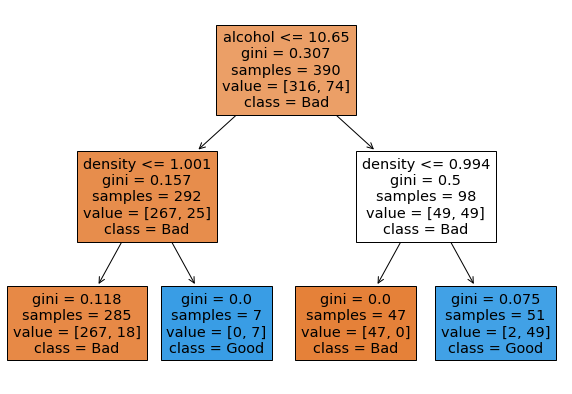

In [16]:
plt.figure(figsize=(10,7))
plot_tree(dtc_gini, feature_names = list(X), class_names = ['Bad', 'Good'], filled=True)
plt.show()

In [29]:
i = 1
[X_test.iloc[i]]

[alcohol    12.0000
 density     0.9962
 Name: 77, dtype: float64]

In [30]:
proba_0 = 2/(2+49)
proba_1 = 49/(2+49)
print([[proba_0, proba_1]])

[[0.0392156862745098, 0.9607843137254902]]


In [31]:
res = dtc_gini.predict([X_test.iloc[i]])[0]
prob = dtc_gini.predict_proba([X_test.iloc[i]])
if res == 0:
    print('Bad')
    print(prob)
else:
    print('Good')
    print(prob)

Good
[[0.03921569 0.96078431]]


> ## W/ scaling

In [33]:
mm = MinMaxScaler()
X_scaled_train = mm.fit_transform(X_train)
X_scaled_test = mm.transform(X_test)

In [35]:
dtc_gini_scaled = DecisionTreeClassifier(max_depth=2).fit(X_scaled_train, y_train)

In [37]:
y_pred_scaled = dtc_gini_scaled.predict(X_scaled_test)
print('Accuracy score for scaled data:', accuracy_score(y_test, y_pred_scaled))

Accuracy score for scaled data: 0.9538461538461539
